# De chaos verklaard

Eerder bekeken we het logistische groeimodel om een populatie rupsen voor te stellen. Hierbij stelden we vast dat het model voor bepaalde startwaarden $u_0$ totaal onvoorspelbaar is! In deze module zal je leren hoe dit komt.

## Interactieve notebook

In deze module ga je meteen aan de slag met een interactieve online notebook, waarin je Python zal gebruiken om enkele interessante grafieken op te stellen.

[![Knop](files/knop.png "Knop")](https://kiks.ilabt.imec.be/jupyterhub/?id=6010)

<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

# De chaos verklaard

## Logistische groei

De volgende functie gebruikte je reeds in de vorige module om de populatiegrootte in de volgende tijdsstap uit te drukken aan de hand van een logistisich groeimodel:

In [1]:
def logistische_groei(u, a, K):
    '''
    Recursief voorschrift van de logistische groei
    
    Parameters
    ----------
    u: float
        de initiële populatiegrootte
    r: float
        het groeipercentage
    K: int
        de draagkracht
    
    Output
    ------
    float
        de nieuwe populatiegrootte
    '''
    
    return (1 + (a - 1) * (1 - u / K)) * u

## Een nieuw gezichtspunt

Eerder zag je al dat de waarde van $r$ een sterke invloed uitoefent op het gedrag van de logistische groei. Hiertoe stelde je verschillende spreidingsdiagrammen op, die de populatiegrootte doorheen de tijd weergaven.

Een andere figuur kan je evenwel een beter inzicht geven in wat er nu eigenlijk gebeurt. Als je op de x-as $u_{t - 1}$ en op de y-as $u_t$ plot, kan je zien hoe de populatiegrootte verandert van de ene tijdsstap naar de volgende. Dit kan aan de hand van volgende functie:

In [2]:
# importeer de nodige bibliotheken
from matplotlib import pyplot as plt
import numpy as np


def plot_logistische_groei(u_0, a, K):
    '''
    Functie die de overgang van populatiegroottes plot in een diagram
    
    Parameters
    ----------
    u_0: float
        de initiële populatiegrootte
    a: float
        de groeifactor
    K: int
        de draagkracht
    '''
    
    # initaliseer een rij met populatiegroottes op tijdstip t - 1
    data_u_x = np.arange(a * K / (a - 1) + 1)
    
    # bereken de populatiegroottes op tijdstip t
    data_u_y = logistische_groei(data_u_x, a, K)
    
    # bereken de populatiegroottes voor de eerste 50 generaties
    data_u = np.array([u_0])
    for t in range(50):
        u_t = logistische_groei(data_u[-1], a, K)
        data_u = np.append(data_u, u_t)
        data_u = np.append(data_u, u_t)
    
    # maak een nieuwe figuur
    plt.figure()
    
    # plot de logistische vergelijking
    plt.plot(data_u_x, data_u_y)
    
    # plot de eerste bissector
    plt.plot([0, 12000], [0, 12000])
    
    # plot de transities tussen populatiegroottes als een trap
    plt.plot(data_u[:-1], data_u[1:])
    
    # plot het evenwichtspunt
    plt.scatter(K, K)
    
    # voeg een legende toe
    plt.legend(["logistische vergelijking", "eerste bissector",
                "transities", "evenwichtspunt"], loc="upper right",
               bbox_to_anchor=(1.5, 1.027))
    
    # breng verduidelijkende labels aan
    plt.xlabel("$u_{t - 1}$")
    plt.ylabel("$u_t$")
    
    # voeg een titel toe
    plt.title(f"Logistische groei met $a = {a}, K = {K}$")
    
    # toon de grafiek
    plt.show()

Je kan deze functie nu oproepen met verschillende waarden voor $a$. Voor $a = 1{,}6$ bekom je:

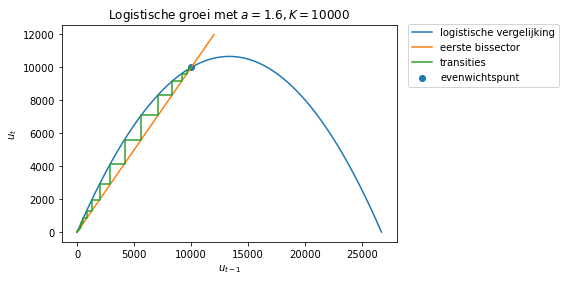

In [3]:
u_0 = 5
K = 10000
plot_logistische_groei(u_0, 1.6, K)

Merk op dat hierbij twee hulplijnen getekend worden:

- De logistische vergelijking $u_t = \left[1 + r \left(1 - \frac{x}{K}\right)\right] \cdot u_{t - 1}$, getekend in het blauw

- De eerste bissectrice die het vlak in twee snijdt, getekend in het oranje

Deze laatste is nuttig omdat de waarde $x_t$ van de ene generatie de waarde $x_{t - 1}$ van de volgende generatie is. Omdat er koppels $x_{t}, x_{t}$ gevormd worden, zullen er punten zijn op de eerste bissectrice liggen.

Door de evolutie van de populatie als een trap tussen deze twee curves voor te stellen, zie je hier hoe de populatie naar het snijpunt tussen de curves convergeert. Dit snijpunt komt overeen met de populatiegrootte bij evenwicht. Deze grafiek wordt soms poëtisch een **spinnenwebdiagram** genoemd.

### Opdracht 1

Plot nu een spinnenwebdiagram voor $a = 3{,}34$. Wat stel je vast?

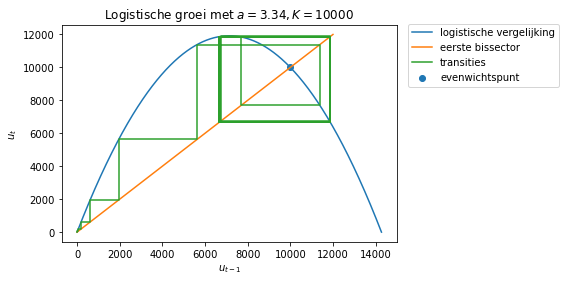

In [4]:
plot_logistische_groei(u_0, 3.34, K)

Als alles goed is, stel je voor $a = 3{,}34$ vast dat de groene lijn na enkele generaties quasi perfect symmetrisch terugkaatst tussen de logistische vergelijking en de bissectrice. Je verkrijgt daardoor de oscillaties die je eerder waarnam, van de ene toestand naar de andere. Er ontstaat dus een steeds terugkerend patroon met periode twee!

### Opdracht 2

Doe nu hetzelfde voor $a = 3{,}455$. Wat stel je vast?

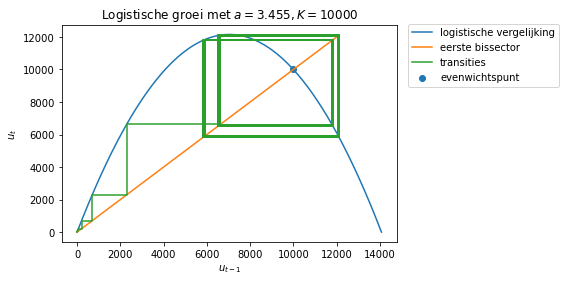

In [5]:
plot_logistische_groei(u_0, 3.455, K)

Deze keer stel je vast dat er niet twee, maar vier punten regelmatig bezocht worden. Je verkrijgt daardoor de oscillaties die je eerder waarnam, waarbij telkens afgewisseld wordt tussen vier toestanden. Er ontstaat dus een steeds terugkerend patroon met periode vier!

### Opdracht 3

Doe finaal hetzelfde voor $a = 3{,}6$. Wat stel je vast?

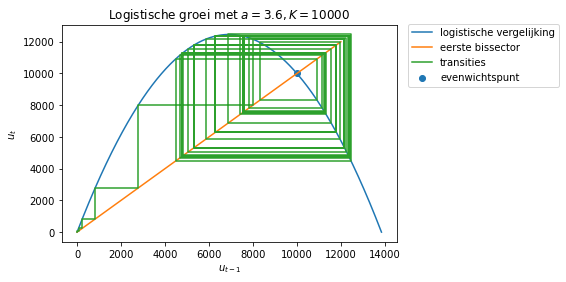

In [6]:
plot_logistische_groei(u_0, 3.6, K)

De vorm van de logistische verlijking is nu anders, waardoor de bissectrice na de top komt. Voor $a = 3.6$ verspringt de lijn voortdurend voor en na de top, wat verklaart waarom het gedrag zo onvoorspelbaar is. Er ontstaat een **chaotisch regime**!

Wat als je kijkt naar verschillende waarden voor de groeifactor $a$? Dit kan je doen aan de hand van een bifurcatieplot. Je kunt voor alle waarden van $a$ van $0$ tot $4$ met tussenstappen van $0{,}01$ de logistische vergelijking toepassen voor een groot aantal stappen (hier $100$), telkens met 100 gehele startwaarden willekeurig getrokken uit het interval van $1$ tot $K - 1$. Voer volgende code uit, en probeer te verklaren wat je ziet:

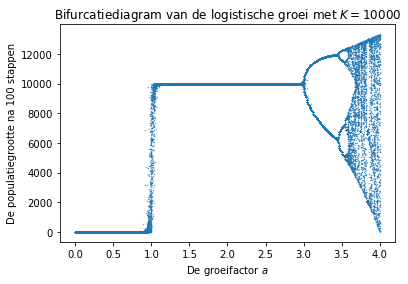

In [7]:
# initialiseer twee lege rijen
data_a = []
data_u = []

# itereer over alle waarden van 0 tot 4 met tussenstappen van 0,01
for a in np.arange(0, 4.005, 0.01):
    
    # itereer over alle startwaarden van 1 tot K - 1
    for u_0 in np.random.randint(1, K, size=100):
        
        # bereken de populatiegrootte na 100 generaties
        u = u_0
        for _ in range(100):
            u = logistische_groei(u, a, K)
        
        # voeg de groeifactor en de populatiegrootte toe
        data_a.append(a)
        data_u.append(u)

# maak een nieuwe grafiek aan
plt.figure()

# plot alle punten
plt.scatter(data_a, data_u, 0.1)

# breng verduidelijkende labels aan
plt.xlabel("De groeifactor $a$")
plt.ylabel("De populatiegrootte na 100 stappen")

# voeg een titel toe
plt.title(f"Bifurcatiediagram van de logistische groei met $K = {K}$")

# toon de grafiek
plt.show()

Hierop kan je onmiddellijk zien welke eindwaarden mogelijk zijn voor bepaalde waarden van $a$. Je kan volgende gevallen onderscheiden:

- Voor $0 < a < 1$ is er geen groei, de populatie sterft uit;

- Voor $1 \le a < 3$ is er convergentie naar $K$;

- Voor $3 \le a < 4$ stel je eerst een splitsing (een bifurcatie) in twee vast, die duidt op een periodieke reeks met periode twee. Voor hogere waarden stel je een periodieke reeks van vier vast, om uiteindelijk naar een chaotisch regime over te gaan.

### Opdracht 4

Stel een bifurcatiediagram op waarbij:

- de draagkracht gelijk is aan $K = 100$
- alle gehele waarden in het interval $[1, K - 1]$ gebruikt worden als de startwaarde $u_0$
- waarden voor $a$ geëvalueerd worden in het interval $[0, 5]$, met tussenstappen van $0{,}01$
- er 200 generaties beschouwd worden

Wat stel je visueel vast voor waarden van $a > 4$, en welke foutmelding wordt getoond? Als je je afvraagt hoe dit komt, bekijk je best even de gegenereerde populatiegroottes in de lijst `y_data`. Wat stel je vast voor $a > 4$?

C:\Users\Jeroen\AppData\Local\Temp\ipykernel_4428\1734344659.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (1 + (a - 1) * (1 - u / K)) * u


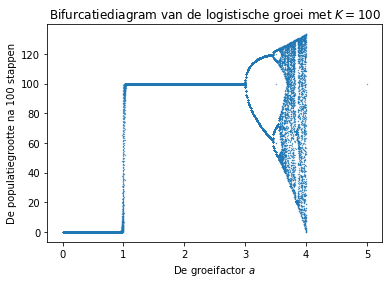

In [8]:
K = 100
a_data = []
u_data = []
for a in np.arange(0, 5.005, 0.01):
    for u_0 in range(1, K):
        u = u_0
        for _ in range(200):
            u = logistische_groei(u, a, K)
        a_data.append(a)
        u_data.append(u)
plt.figure()
plt.scatter(a_data, u_data, 0.1)
plt.xlabel("De groeifactor $a$")
plt.ylabel("De populatiegrootte na 100 stappen")
plt.title(f"Bifurcatiediagram van de logistische groei met $K = {K}$")
plt.show()

In [9]:
print(u_data[-10:])

[-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]


Voor $a > 4$, kan de populatiegrootte negatief worden. Dit leidt tot ongeldige resultaten, die algauw escaleren tot extreem negatieve waarden. Deze worden niet geplot, omdat ze gemapt worden op min oneindig. In de praktijk zullen bifurcatiediagrammen nooit geplot worden voor $a > 4$. Zoek gerust eens naar andere bifurcatiediagrammen in je favoriete zoekmachine!

### Opdracht 5

Breid de code hierboven zo uit dat je het laatste bifurcatiediagram automatisch opslaat in het bestand `bifurcatiediagram.pdf`, zonder overbodige witruimte rond de figuur. Hoe je dit kan doen vind je [hier](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) terug.

C:\Users\Jeroen\AppData\Local\Temp\ipykernel_4428\1734344659.py:20: RuntimeWarning: overflow encountered in double_scalars
  return (1 + (a - 1) * (1 - u / K)) * u


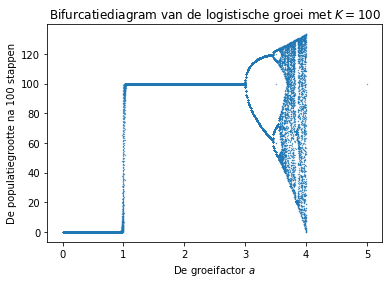

In [10]:
K = 100
a_data = []
u_data = []
for a in np.arange(0, 5.005, 0.01):
    for u_0 in range(1, K):
        u = u_0
        for _ in range(200):
            u = logistische_groei(u, a, K)
        a_data.append(a)
        u_data.append(u)
plt.figure()
plt.scatter(a_data, u_data, 0.1)
plt.xlabel("De groeifactor $a$")
plt.ylabel("De populatiegrootte na 100 stappen")
plt.title(f"Bifurcatiediagram van de logistische groei met $K = {K}$")
plt.savefig('bifurcatiedagram.pdf', bbox_inches='tight')
plt.show()

## De insecten voorbij

De logistische vergelijking is enorm belangrijk, niet omdat ze biologisch gezien zo realistisch is, maar omdat het een van de simpelste manieren is om een chaotische reeks te genereren. **Chaostheorie, de wetenschap dat kleine oorzaken grote, onverwachte gevolgen kunnen hebben**, is een relatief jonge tak van de wiskunde. Ze kon pas bloeien in de 20ste eeuw, toen computers het mogelijk maakten om snel computationele experimenten uit te voeren (zoals jij hier gedaan hebt).

Een van de pioniers in dit veld was de weerkundige **Edward Lorenz**. Terwijl hij experimenteerde met een eenvoudig weermodel rondde hij de getallen af van zes naar drie cijfers om de berekeningen sneller te laten lopen. Tot ontsteltenis van de wetenschappelijke gemeenschap, die er tot dan van uitging dat deze afronding slechts in een triviale afrondingsfout zou resulteren, werd vastgesteld dat deze tot **significant verschillende uitkomsten** leidde. Tegenwoordig is het algemeen aanvaard dat systemen zoals het weer (en de stromingen van vloeistoffen in het algemeen) chaotisch zijn. Dit maakt het zo goed als onmogelijk om het weer meer dan een week op voorhand nauwkeurig te voorspellen. Onderstaande grafiek toont dit aan:

![Weersvoorspelling](files/weersvoorspelling.png "https://randalolson.com/2014/06/21/we-can-only-forecast-the-weather-a-few-days-into-the-future/")

Hier zie je de gemiddelde fout tussen de voorspelde en de geobserveerde temperatuur als een functie van het aantal dagen in de toekomst waarvoor je de temperatuur tracht te voorspellen. Als je je enkel baseert op klimatologische data - bijvoorbeeld door na te gaan hoe warm het typisch is op deze dag van het jaar - dan zien je dat de fout 7 graden Fahrenheit bedraagt, of ongeveer 4 graden Celsius (oranje). Voorspel je dat de temperatuur de komende dagen niet zal veranderen (blauw), dan verkrijg je enkel daags nadien een voorspelling die nauwkeuriger is dan deze op basis van klimatologische data. Gebruik je finaal geavanceerde weersmodellen (grijs), dan zie je dat **de afwijking tussen de voorspelde en de werkelijke temperatuur toeneemt naarmate je verder in de tijd proberen te voorspellen**. Dit toont aan dat het inderdaad moeilijk is om het weer ver op voorhand te voorspellen!